<img src='human-activity.jpg'>

<br>


<center>    
    <h1> Human Activity Recognition Problem </h1>    
</center>
<br>

<br>

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

This dataset is collected from 30 persons(referred as subjects in this dataset), performing different activities with a smartphone to their waists. The data is recorded with the help of sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually.

## How data was recorded

By using the sensors(Gyroscope and accelerometer) in a smartphone, they have captured '3-axial linear acceleration'(_tAcc-XYZ_) from accelerometer and '3-axial angular velocity' (_tGyro-XYZ_) from Gyroscope with several variations. 

> prefix 't' in those metrics denotes time.

> suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.

### Feature names

1. These sensor signals are preprocessed by applying noise filters and then sampled in fixed-width windows(sliding windows) of 2.56 seconds each with 50% overlap. ie., each window has 128 readings. 

2. From Each window, a feature vector was obtianed by calculating variables from the time and frequency domain.
> In our dataset, each datapoint represents a window with different readings 
3. The accelertion signal was saperated into Body and Gravity acceleration signals(___tBodyAcc-XYZ___ and ___tGravityAcc-XYZ___) using some low pass filter with corner frequecy of 0.3Hz.

4. After that, the body linear acceleration and angular velocity were derived in time to obtian _jerk signals_ (___tBodyAccJerk-XYZ___ and ___tBodyGyroJerk-XYZ___). 

5. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like _tBodyAccMag_, _tGravityAccMag_, _tBodyAccJerkMag_, _tBodyGyroMag_ and _tBodyGyroJerkMag_.

6. Finally, We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). These signals obtained were labeled with ___prefix 'f'___ just like original signals with ___prefix 't'___. These signals are labeled as ___fBodyAcc-XYZ___, ___fBodyGyroMag___ etc.,.

7. These are the signals that we got so far.
	+ tBodyAcc-XYZ
	+ tGravityAcc-XYZ
	+ tBodyAccJerk-XYZ
	+ tBodyGyro-XYZ
	+ tBodyGyroJerk-XYZ
	+ tBodyAccMag
	+ tGravityAccMag
	+ tBodyAccJerkMag
	+ tBodyGyroMag
	+ tBodyGyroJerkMag
	+ fBodyAcc-XYZ
	+ fBodyAccJerk-XYZ
	+ fBodyGyro-XYZ
	+ fBodyAccMag
	+ fBodyAccJerkMag
	+ fBodyGyroMag
	+ fBodyGyroJerkMag

8. We can esitmate some set of variables from the above signals. ie., We will estimate the following properties on each and every signal that we recoreded so far.

	+ ___mean()___: Mean value
	+ ___std()___: Standard deviation
	+ ___mad()___: Median absolute deviation 
	+ ___max()___: Largest value in array
	+ ___min()___: Smallest value in array
	+ ___sma()___: Signal magnitude area
	+ ___energy()___: Energy measure. Sum of the squares divided by the number of values. 
	+ ___iqr()___: Interquartile range 
	+ ___entropy()___: Signal entropy
	+ ___arCoeff()___: Autorregresion coefficients with Burg order equal to 4
	+ ___correlation()___: correlation coefficient between two signals
	+ ___maxInds()___: index of the frequency component with largest magnitude
	+ ___meanFreq()___: Weighted average of the frequency components to obtain a mean frequency
	+ ___skewness()___: skewness of the frequency domain signal 
	+ ___kurtosis()___: kurtosis of the frequency domain signal 
	+ ___bandsEnergy()___: Energy of a frequency interval within the 64 bins of the FFT of each window.
	+ ___angle()___: Angle between to vectors.

9. We can obtain some other vectors by taking the average of signals in a single window sample. These are used on the angle() variable'
`
	+ gravityMean
	+ tBodyAccMean
	+ tBodyAccJerkMean
	+ tBodyGyroMean
	+ tBodyGyroJerkMean


###  Y_Labels(Encoded)
+ In the dataset, Y_labels are represented as numbers from 1 to 6 as their identifiers.

	- WALKING as __1__
	- WALKING_UPSTAIRS as __2__
	- WALKING_DOWNSTAIRS as __3__
	- SITTING as __4__
	- STANDING as __5__
	- LAYING as __6__
    
## Train and test data were saperated
 - The readings from ___70%___ of the volunteers were taken as ___trianing data___ and remaining ___30%___ subjects recordings were taken for ___test data___
 
## Data

* All the data is present in 'UCI_HAR_dataset/' folder in present working directory.
     - Feature names are present in 'UCI_HAR_dataset/features.txt'
     - ___Train Data___
         - 'UCI_HAR_dataset/train/X_train.txt'
         - 'UCI_HAR_dataset/train/subject_train.txt'
         - 'UCI_HAR_dataset/train/y_train.txt'
     - ___Test Data___
         - 'UCI_HAR_dataset/test/X_test.txt'
         - 'UCI_HAR_dataset/test/subject_test.txt'
         - 'UCI_HAR_dataset/test/y_test.txt'
         

## Data Size :
> 27 MB


# Quick overview of the dataset :



* Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.

    1. Walking     
    2. WalkingUpstairs 
    3. WalkingDownstairs 
    4. Standing 
    5. Sitting 
    6. Lying.


* Readings are divided into a window of 2.56 seconds with 50% overlapping. 

* Accelerometer readings are divided into gravity acceleration and body acceleration readings,
  which has x,y and z components each.

* Gyroscope readings are the measure of angular velocities which has x,y and z components.

* Jerk signals are calculated for BodyAcceleration readings.

* Fourier Transforms are made on the above time readings to obtain frequency readings.

* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, engerybands,entropy etc., are calculated for each window.

* We get a feature vector of 561 features and these features are given in the dataset.

* Each window of readings is a datapoint of 561 features.

## Problem Framework

* 30 subjects(volunteers) data is randomly split to 70%(21) test and 30%(7) train data.
* Each datapoint corresponds one of the 6 Activities.


## Problem Statement

 + Given a new datapoint we have to predict the Activity

In [125]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import itertools
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'DejaVu Sans'
import seaborn as sns

# To be able to save images on server
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM , BatchNormalization
from keras.layers.core import Dense, Dropout
from keras.regularizers import L1L2

In [2]:
# get the features from the file features.txt
features = list()
with open('UCI_HAR_Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))


No of Features: 561


## Obtain the  train data 

In [6]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None, squeeze=True)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'], squeeze=True)
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2872,0.270531,-0.02003,-0.13885,-0.99541,-0.975719,-0.943967,-0.995795,-0.972381,-0.936507,-0.941844,...,-0.008515,0.197218,0.671482,0.017963,-0.785501,0.208703,0.120328,16,5,STANDING


In [7]:
train.shape

(7352, 564)

## Obtain the  test data 

In [8]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None, names=features)

# add subject column to the dataframe
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None, squeeze=True)

# get y labels from the txt file
y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'], squeeze=True)
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1887,0.277531,-0.015711,-0.1131,-0.996947,-0.98728,-0.986408,-0.997356,-0.986709,-0.985017,-0.94307,...,0.089625,-0.773657,0.85089,0.864327,-0.79615,0.235521,-0.014485,18,5,STANDING


In [9]:
test.shape

(2947, 564)

# Data Cleaning

## 1. Check for Duplicates

In [10]:
print('No of duplicates in train: {}'.format(sum(train.duplicated())))
print('No of duplicates in test : {}'.format(sum(test.duplicated())))

No of duplicates in train: 0
No of duplicates in test : 0


## 2. Checking for NaN/null values

In [11]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


## 3. Check for data imbalance

In [12]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

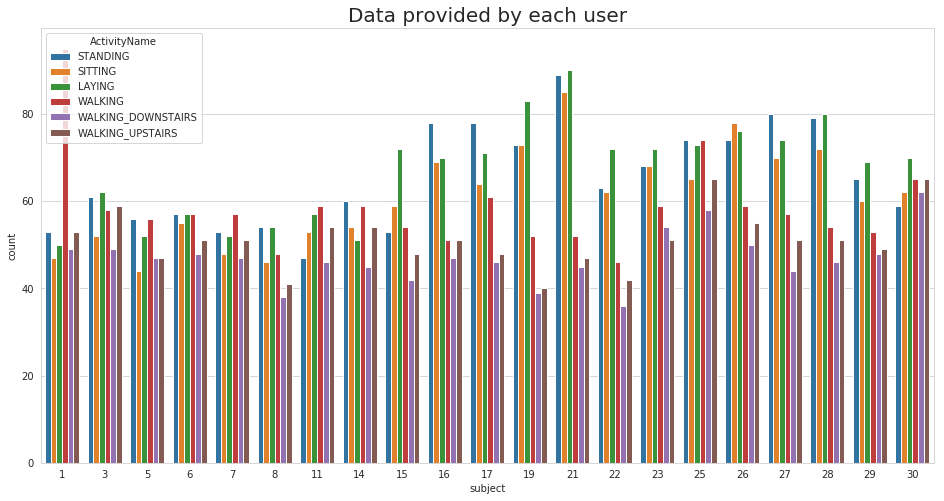

In [13]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = train)
plt.show()

> We have got almost same number of reading from all the subjects

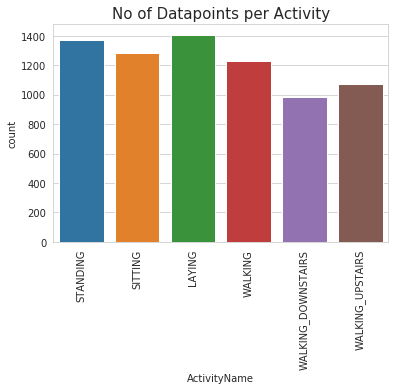

In [14]:
plt.title('No of Datapoints per Activity', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

### Observation
> Our data is well balanced (almost)

## 4. Changing feature names 

In [15]:
columns = train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

train.columns = columns
test.columns = columns

test.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

## 5. Save this dataframe in a csv files

In [16]:
train.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

# Exploratory Data Analysis

"___Without domain knowledge, EDA has no meaning, without EDA a problem has no soul.___"

### 1. Featuring Engineering from Domain Knowledge 




+ __Static and Dynamic Activities__

    - In static activities (sit, stand, lie down) motion information will not be very useful.
	- In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) motion info will be significant.




### 2. Stationary and Moving activities are completely different

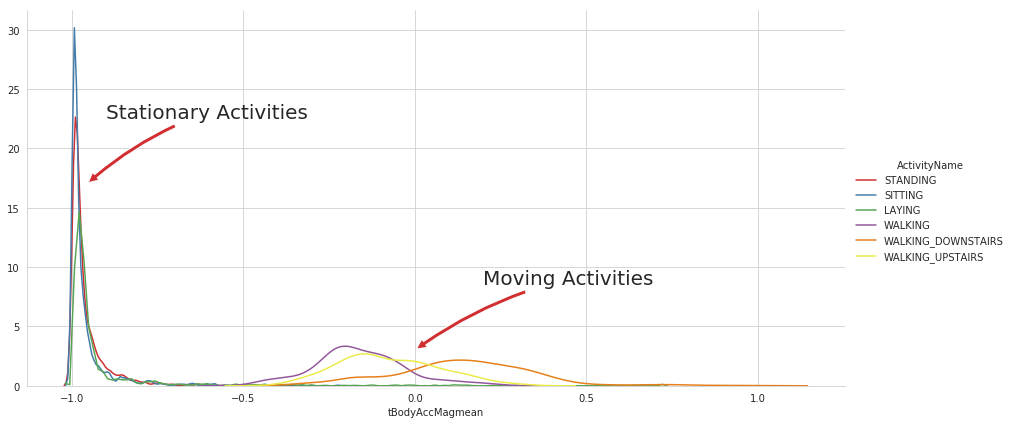

In [17]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='ActivityName', height=6,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,17), xytext=(-0.9, 23), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

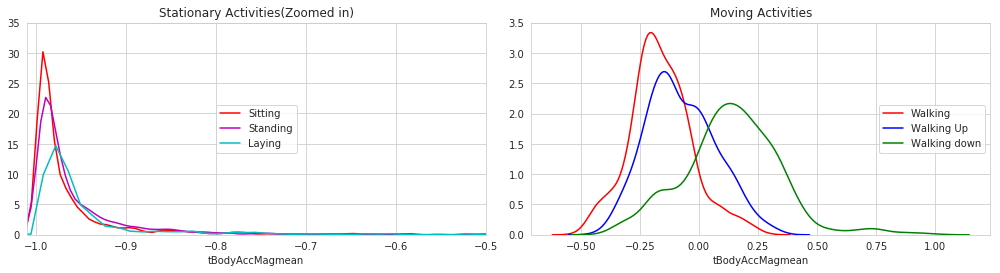

In [18]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = train[train['Activity']==1]
df2 = train[train['Activity']==2]
df3 = train[train['Activity']==3]
df4 = train[train['Activity']==4]
df5 = train[train['Activity']==5]
df6 = train[train['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.01, -0.5, 0, 35])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of an acceleration can saperate it well

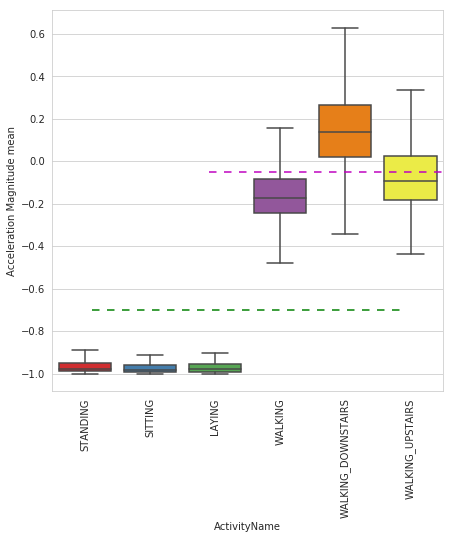

In [19]:
plt.figure(figsize=(7,7))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=train, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

__ Observations__:
- If tAccMean is < -0.8 then the Activities are either Standing or Sitting or Laying.
- If tAccMean is > -0.6 then the Activities are either Walking or WalkingDownstairs or WalkingUpstairs.
- If tAccMean > 0.0 then the Activity is WalkingDownstairs.
- We can classify 75% the Acitivity labels with some errors.

### 4. Position of GravityAccelerationComponants also matters 

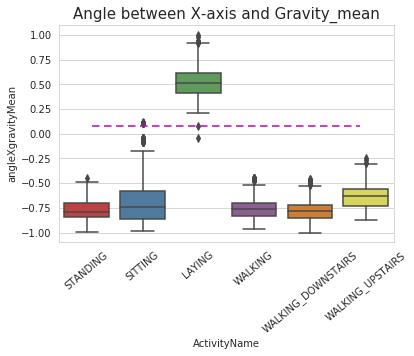

In [20]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=train)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

__ Observations__:
* If angleX,gravityMean > 0 then Activity is Laying.
* We can classify all datapoints belonging to Laying activity with just a single if else statement.

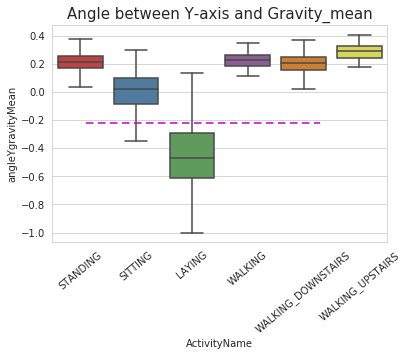

In [21]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = train, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

# Apply t-sne on the data 

In [22]:
# performs t-sne with different perplexity values and their repective plots..
def perform_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # perform t-sne
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Done..')
        
        # prepare the data for seaborn         
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y_data})
        
        # draw the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')



performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.170s...
[t-SNE] Computed neighbors for 7352 samples in 31.144s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.635855
[t-SNE] Computed conditional probabilities in 0.028s
[t-SNE] Iteration 50: error = 124.5738525, gradient norm = 0.0296602 (50 iterations in 5.255s)
[t-SNE] Iteration 100: error = 107.1510468, gradient norm = 0.0297832 (50 iterations in

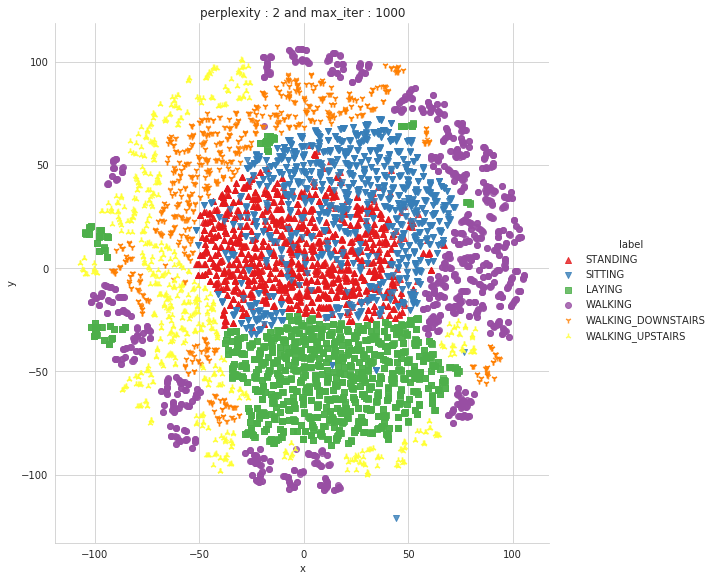

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.191s...
[t-SNE] Computed neighbors for 7352 samples in 31.631s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961265
[t-SNE] Computed conditional probabilities in 0.040s
[t-SNE] Iteration 50: error = 114.0045013, gradient norm = 0.0218148 (50 iterations in 3.931s)
[t-SNE] Iteration 100: error = 97.7540359, gradient norm = 0.0201030 (50 iteratio

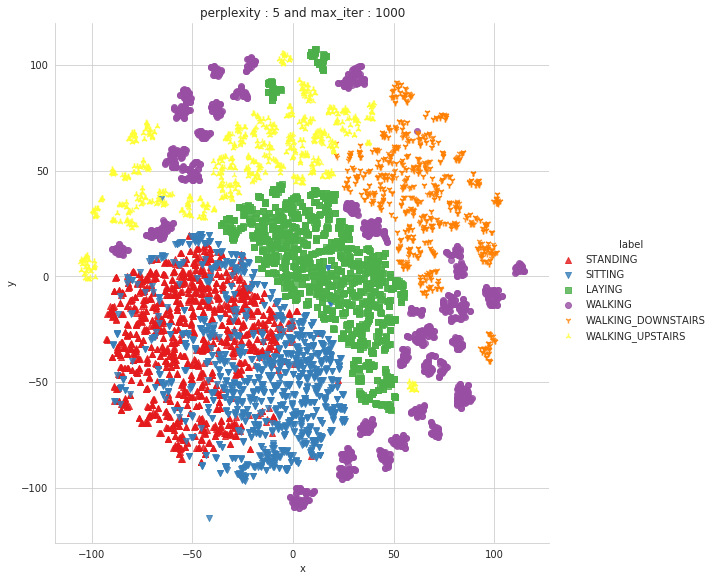

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.184s...
[t-SNE] Computed neighbors for 7352 samples in 32.098s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133828
[t-SNE] Computed conditional probabilities in 0.075s
[t-SNE] Iteration 50: error = 105.5975342, gradient norm = 0.0265865 (50 iterations in 3.493s)
[t-SNE] Iteration 100: error = 90.2277222, gradient norm = 0.0105441 (50 iterati

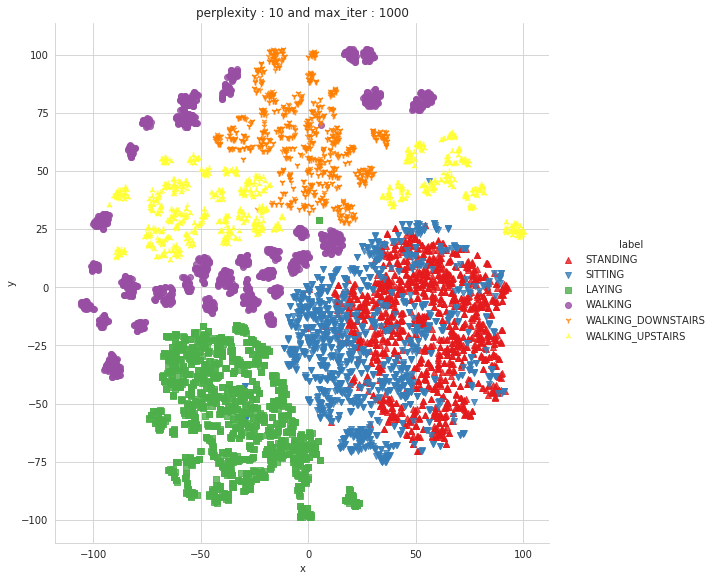

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.185s...
[t-SNE] Computed neighbors for 7352 samples in 32.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274335
[t-SNE] Computed conditional probabilities in 0.142s
[t-SNE] Iteration 50: error = 97.8273087, gradient norm = 0.0185177 (50 iterations in 3.108s)
[t-SNE] Iteration 100: error = 83.8836975, gradient norm = 0.0064890 (50 iteratio

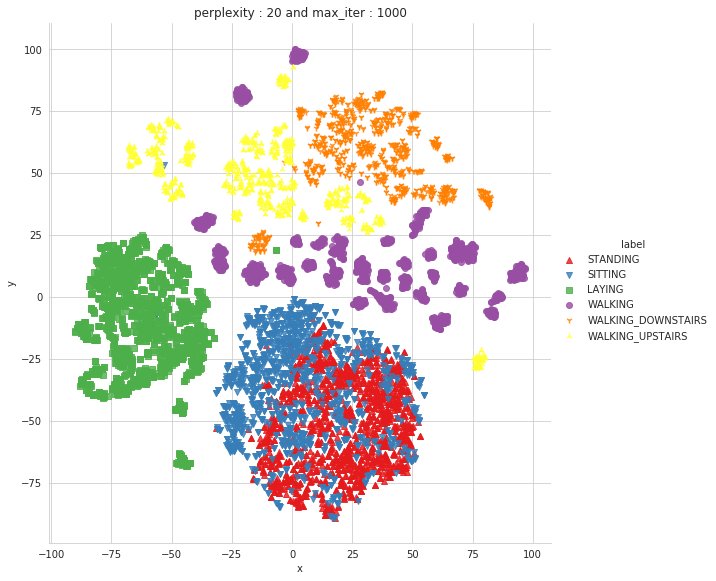

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.185s...
[t-SNE] Computed neighbors for 7352 samples in 33.970s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.344s
[t-SNE] Iteration 50: error = 86.8576126, gradient norm = 0.0147354 (50 iterations in 4.192s)
[t-SNE] Iteration 100: error = 75.6796341, gradient norm = 0.0045453 (50 iterati

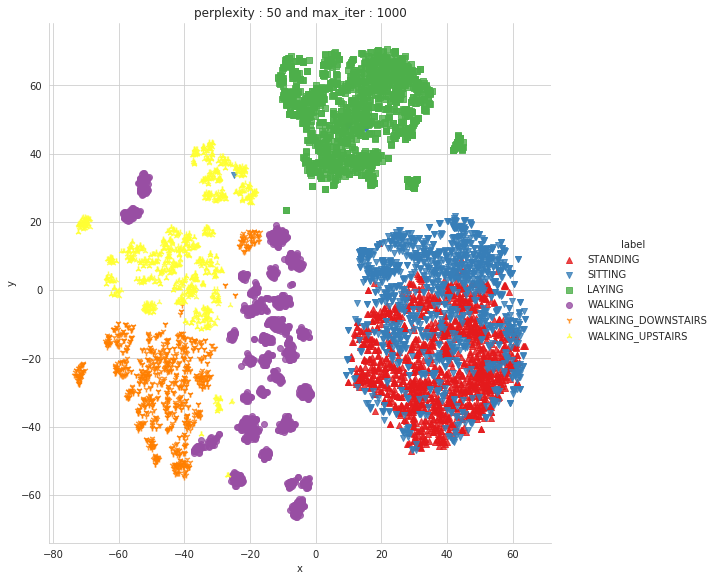

Done


In [23]:
X_pre_tsne = train.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train['ActivityName']
perform_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

## Apply Machine Learning Models

In [24]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(train.shape, test.shape)

(7352, 564) (2947, 564)


In [25]:
train.head(3)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING


In [28]:
# get x_train and y_train from csv files
x_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

# get x_test and y_test from test csv file
x_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('x_train and y_train : ({},{})'.format(x_train.shape, y_train.shape))
print('x_test  and y_test  : ({},{})'.format(x_test.shape, y_test.shape))

x_train and y_train : ((7352, 561),(7352,))
x_test  and y_test  : ((2947, 561),(2947,))


### Labels that are useful in plotting confusion matrix

In [30]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

### Function to plot the confusion matrix

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Generic function to run any model specified

In [33]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### Method to print the gridsearch Attributes

In [35]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

# 1. Logistic Regression with Grid Search

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   46.4s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:52.450343


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  1 428  58   0   0   4]
 [  0  12 519   1   0   0]
 [  0   0   0 495   1   0]
 [  0   0   0   3 409   8]
 [  0   0   0  22   0 449]]


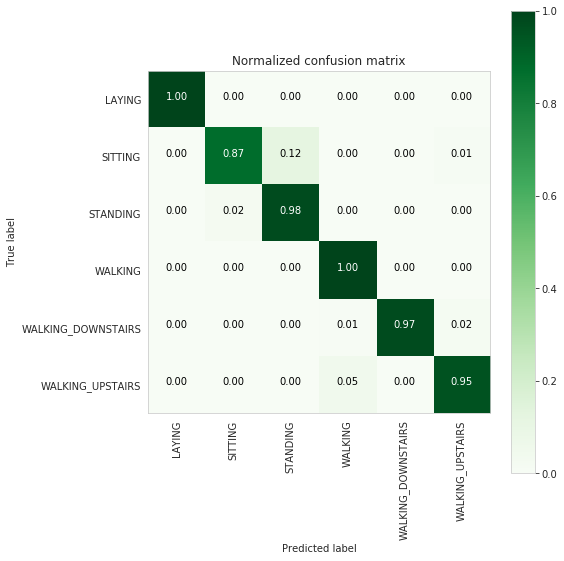

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.95      1.00      0.97       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.95      0.96       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [42]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, x_train, y_train, x_test, y_test, class_labels=labels)

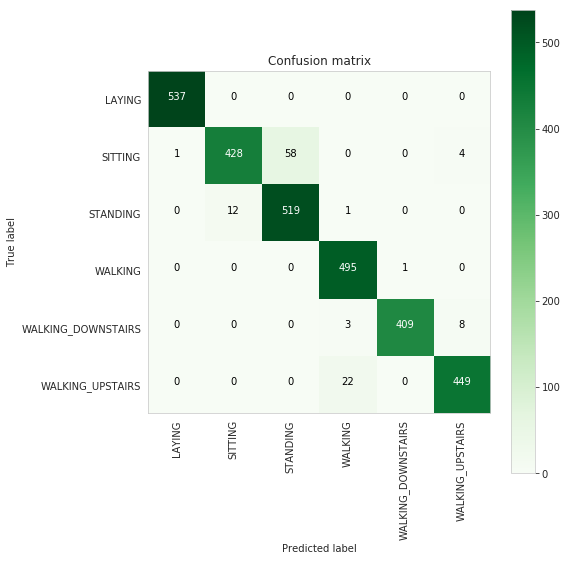

In [44]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_reg_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [45]:
# observe the attributes of the model 
print_grid_search_attributes(log_reg_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=30, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 30, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



#  2. Linear SVC with GridSearch

training the model..
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   12.6s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:16.079952


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.9650492025788938


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 424  60   0   0   5]
 [  0  11 520   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  16   1 454]]


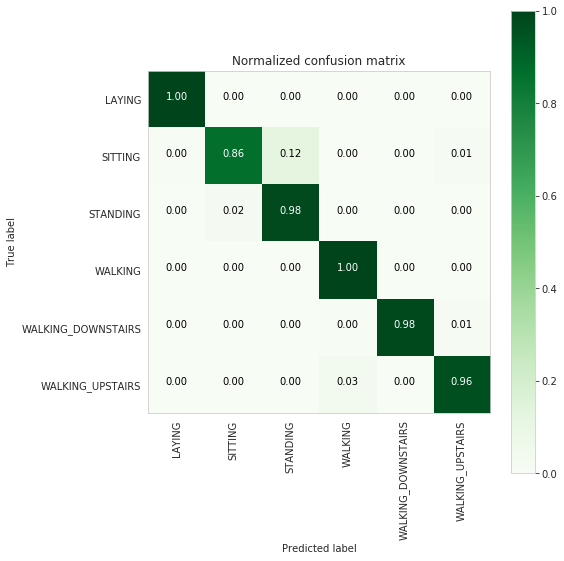

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.86      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

         micro avg       0.97      0.97      0.97      2947
         macro avg       0.97      0.96      0.97      2947
      weighted avg       0.97      0.97      0.96      2947



In [46]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

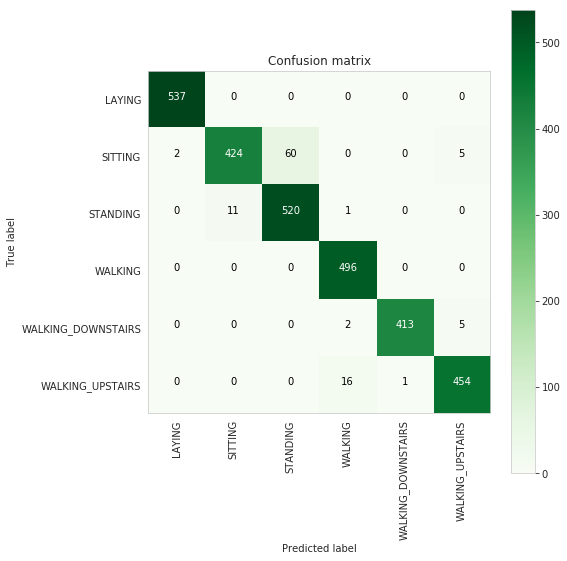

In [47]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(lr_svc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [48]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=2, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
     verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 2}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9461371055495104



# 3.  RBF Kernel SVM with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:03:27.976105


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.113316


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


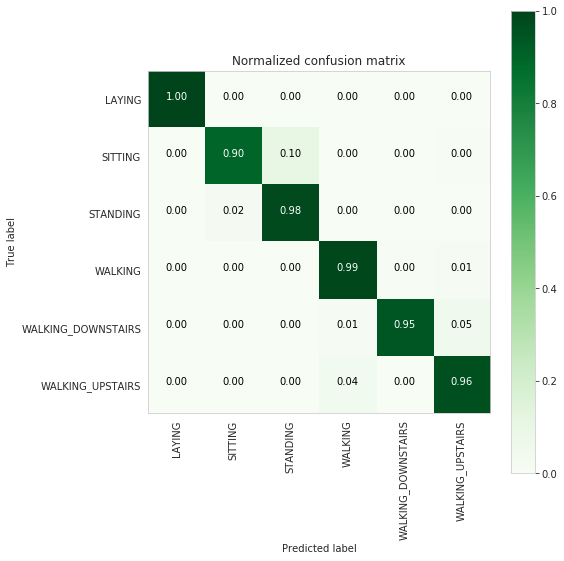

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

         micro avg       0.96      0.96      0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [49]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, x_train, y_train, x_test, y_test, class_labels=labels)

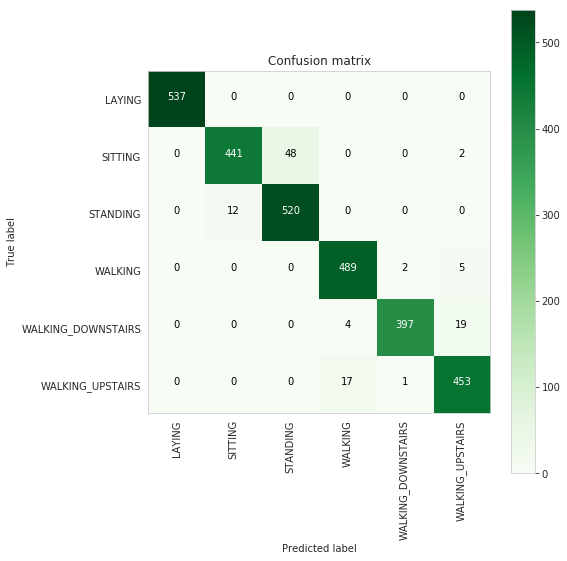

In [50]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rbf_svm_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [51]:
print_grid_search_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9440968443960827



# 4. Decision Tree with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:00:06.461770


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00


---------------------
|      Accuracy      |
---------------------

    0.8642687478791992


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 385 106   0   0   0]
 [  0  93 439   0   0   0]
 [  0   0   0 472  16   8]
 [  0   0   0  18 340  62]
 [  0   0   0  78  19 374]]


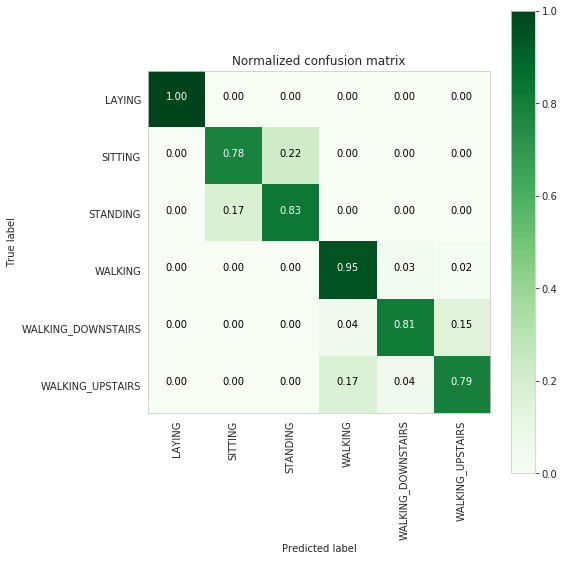

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.81      0.78      0.79       491
          STANDING       0.81      0.83      0.82       532
           WALKING       0.83      0.95      0.89       496
WALKING_DOWNSTAIRS       0.91      0.81      0.86       420
  WALKING_UPSTAIRS       0.84      0.79      0.82       471

         micro avg       0.86      0.86      0.86      2947
         macro avg       0.87      0.86      0.86      2947
      weighted avg       0.87      0.86      0.86      2947



In [53]:
parameters = {'max_depth':np.arange(3,10,2)}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

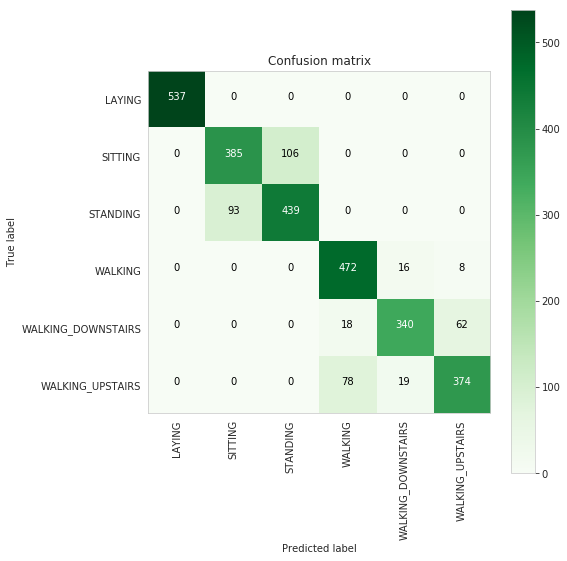

In [54]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(dt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [55]:
print_grid_search_attributes(dt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.8403155603917302



# 5. Random Forest Classifier with GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:02:11.295306


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.039897


---------------------
|      Accuracy      |
---------------------

    0.9114353579911775


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 424  67   0   0   0]
 [  0  47 485   0   0   0]
 [  0   0   0 480  11   5]
 [  0   0   0  36 338  46]
 [  0   0   0  43   6 422]]


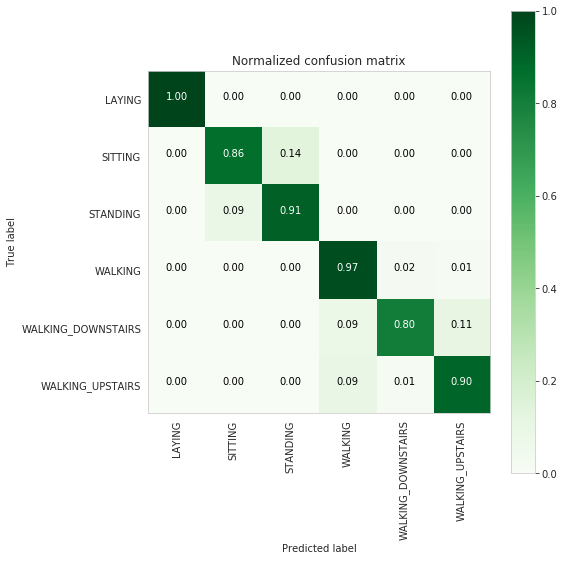

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.90      0.86      0.88       491
          STANDING       0.88      0.91      0.89       532
           WALKING       0.86      0.97      0.91       496
WALKING_DOWNSTAIRS       0.95      0.80      0.87       420
  WALKING_UPSTAIRS       0.89      0.90      0.89       471

         micro avg       0.91      0.91      0.91      2947
         macro avg       0.91      0.91      0.91      2947
      weighted avg       0.91      0.91      0.91      2947



In [56]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

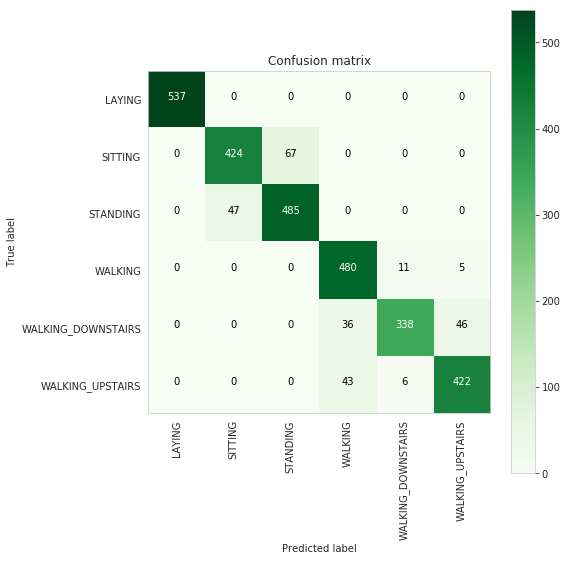

In [57]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(rfc_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [58]:
print_grid_search_attributes(rfc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=130, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 7, 'n_estimators': 130}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9163492927094669



# 6.  Gradient Boosted Decision Trees With GridSearch

training the model..
Done 
 

training_time(HH:MM:SS.ms) - 0:16:17.551946


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.046864


---------------------
|      Accuracy      |
---------------------

    0.9222938581608415


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 397  92   0   0   2]
 [  0  37 495   0   0   0]
 [  0   0   0 483   7   6]
 [  0   0   0  10 374  36]
 [  0   1   0  32   6 432]]


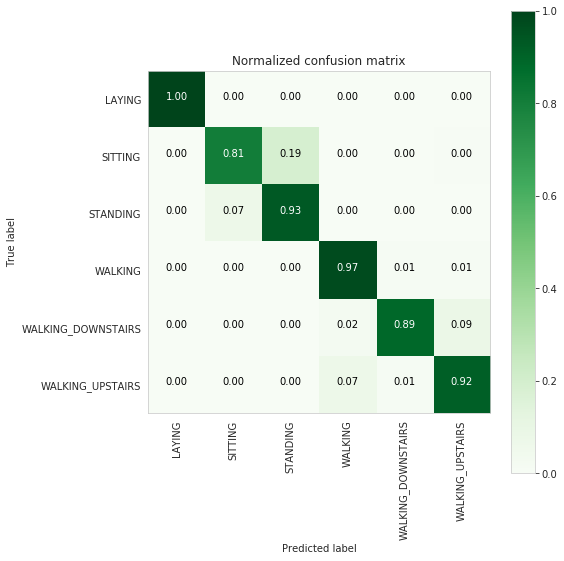

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.91      0.81      0.86       491
          STANDING       0.84      0.93      0.88       532
           WALKING       0.92      0.97      0.95       496
WALKING_DOWNSTAIRS       0.97      0.89      0.93       420
  WALKING_UPSTAIRS       0.91      0.92      0.91       471

         micro avg       0.92      0.92      0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



In [59]:
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

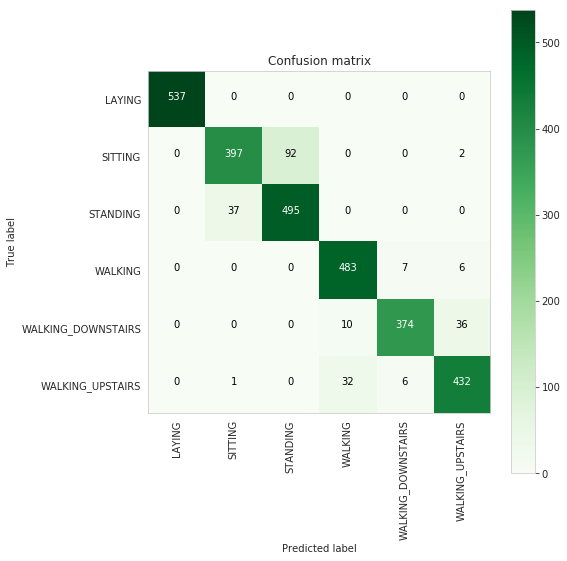

In [60]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(gbdt_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Greens)
plt.show()

In [61]:
print_grid_search_attributes(gbdt_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=140,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 5, 'n_estimators': 140}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
-------------

# 7. Comparing all models

In [62]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('RBF SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 96.27%       3.733%
Linear SVC          : 96.5%       3.495% 
RBF SVM classifier  : 96.27%      3.733% 
DecisionTree        : 86.43%      13.57% 
Random Forest       : 91.14%      8.856% 
GradientBoosting DT : 91.14%      8.856% 


> We can choose ___Logistic regression___ or ___Linear SVC___ or ___RBF SVM___.

<br>
<br>
<br>

## Apply Deep Learning Models

In [63]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

# Data directory
DATADIR = 'UCI_HAR_Dataset'

# Raw data signals
# Signals are from Accelerometer and Gyroscope
# The signals are in x,y,z directions
# Sensor signals are filtered to have only body acceleration
# excluding the acceleration due to gravity
# Triaxial acceleration from the accelerometer is total acceleration
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

In [88]:
# Utility function to print the confusion matrix
def confusion_matrix_dl(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])
    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

# Utility function to read the data from csv file
def _read_csv(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

# Utility function to load the load
def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(
            _read_csv(filename).as_matrix()
        ) 

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

def load_y(subset):
    """
    The objective that we are trying to predict is a integer, from 1 to 6,
    that represents a human activity. We return a binary representation of 
    every sample objective as a 6 bits vector using One Hot Encoding
    (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)
    """
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = _read_csv(filename)[0]

    return pd.get_dummies(y).as_matrix()

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

# Utility function to count the number of classes
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [67]:
# Configuring a session
session_conf = tf.ConfigProto(
    intra_op_parallelism_threads=1,
    inter_op_parallelism_threads=1
)

sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

In [68]:
# Initializing parameters
epochs = 30
batch_size = 16
n_hidden = 32

In [69]:
# Loading the train and test data
x_train, x_test, y_train, y_test = load_data()

In [70]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])
n_classes = _count_classes(y_train)

print(timesteps)
print(input_dim)
print(len(x_train))

128
9
7352


## 1-Layer of LSTM

In [71]:
# Initiliazing the sequential model
model = Sequential()
# Configuring the parameters
model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
# Adding a dropout layer
model.add(Dropout(0.5))
# Adding a dense output layer with sigmoid activation
model.add(Dense(n_classes, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [73]:
# Training the model
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          validation_data=(x_test, y_test),
          epochs=epochs)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 32s 4ms/step - loss: 1.3325 - acc: 0.4347 - val_loss: 1.1713 - val_acc: 0.4713606 - ETA: 3s - loss: 1.3514 - acc: 0.42 - ETA: 3s - loss:  - ETA: 1s - loss: 1.34 - ETA: 0s - loss: 1.3374 - acc:  - ETA: 0s - loss: 1.3341 - acc: 0.
Epoch 2/30
7352/7352 [==============================] - 31s 4ms/step - loss: 1.0133 - acc: 0.5559 - val_loss: 1.0255 - val_acc: 0.4835
Epoch 3/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.8272 - acc: 0.6385 - val_loss: 0.8061 - val_acc: 0.6047
Epoch 4/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.7009 - acc: 0.6533 - val_loss: 0.7685 - val_acc: 0.6064c:
Epoch 5/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.6608 - acc: 0.6766 - val_loss: 0.6847 - val_acc: 0.6420
Epoch 6/30
7352/7352 [==============================] - 31s 4ms/step - loss: 0.6041 - acc: 0.6970 - val_loss: 1.5301 - val_ac

In [89]:
# Confusion Matrix
print(confusion_matrix_dl(y_test, model.predict(x_test)))

Pred                LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
True                                                                         
LAYING                 510        0         0        0                   0   
SITTING                  0      407        80        0                   1   
STANDING                 0      103       429        0                   0   
WALKING                  0        0         0      464                  25   
WALKING_DOWNSTAIRS       0        0         0        0                 419   
WALKING_UPSTAIRS         0        0         0        7                  25   

Pred                WALKING_UPSTAIRS  
True                                  
LAYING                            27  
SITTING                            3  
STANDING                           0  
WALKING                            7  
WALKING_DOWNSTAIRS                 1  
WALKING_UPSTAIRS                 439  


In [78]:
score = model.evaluate(x_test, y_test)

2947/2947 [==============================] - 1s 281us/step


In [79]:
score

[0.3735676897443261, 0.9053274516457415]

## 2-Layer of LSTM with more hyperparameter tunning

### Tuning the Number of neurons with dropout of 0.50

Configuration:

In [126]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

In [158]:
# Plot Confusion Matrix
def plot_confusion_matrix_lstm(y_test, y_predict):
    result = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(12, 10))
    sns.heatmap(result, 
                xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()  
    
# Plot train and cross validation loss
def plot_train_cv_loss(trained_model, epochs, colors=['b']):
    fig, ax = plt.subplots(1,1)    
    ax.set_xlabel('epoch') 
    ax.set_ylabel('Categorical Crossentropy Loss')
    x_axis_values = list(range(1,epochs+1))

    validation_loss = trained_model.history['val_loss']
    train_loss = trained_model.history['loss']   
    
    ax.plot(x_axis_values, validation_loss, 'b', label="Validation Loss")
    ax.plot(x_axis_values, train_loss, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw() 

### 32 neurons in LSTM Layer with dropout of 0.50

In [137]:
# Model execution
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True,bias_regularizer=reg ))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_26 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_4 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_26 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_27 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_______________________________________________________

In [138]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [139]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 72s 10ms/step - loss: 1.5656 - acc: 0.5880 - val_loss: 1.0906 - val_acc: 0.7092
Epoch 2/30
7352/7352 [==============================] - 67s 9ms/step - loss: 0.9216 - acc: 0.7437 - val_loss: 0.7103 - val_acc: 0.8117
Epoch 3/30
7352/7352 [==============================] - 69s 9ms/step - loss: 0.6326 - acc: 0.8190 - val_loss: 0.4852 - val_acc: 0.8595
Epoch 4/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.4648 - acc: 0.8685 - val_loss: 0.3838 - val_acc: 0.8856
Epoch 5/30
7352/7352 [==============================] - 72s 10ms/step - loss: 0.3426 - acc: 0.8992 - val_loss: 0.3206 - val_acc: 0.9023
Epoch 6/30
7352/7352 [==============================] - 73s 10ms/step - loss: 0.3120 - acc: 0.9074 - val_loss: 0.3773 - val_acc: 0.8721
Epoch 7/30
7352/7352 [==============================] - 72s 10ms/step - loss: 0.2754 - acc: 0.9138 - val_loss: 0.3121 - val_acc: 0.9050
Ep

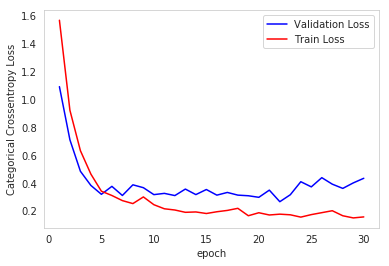

In [141]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 10, we starts to overfit the model, so best value for epoch is 10


Test Accuracy: 88.530709%



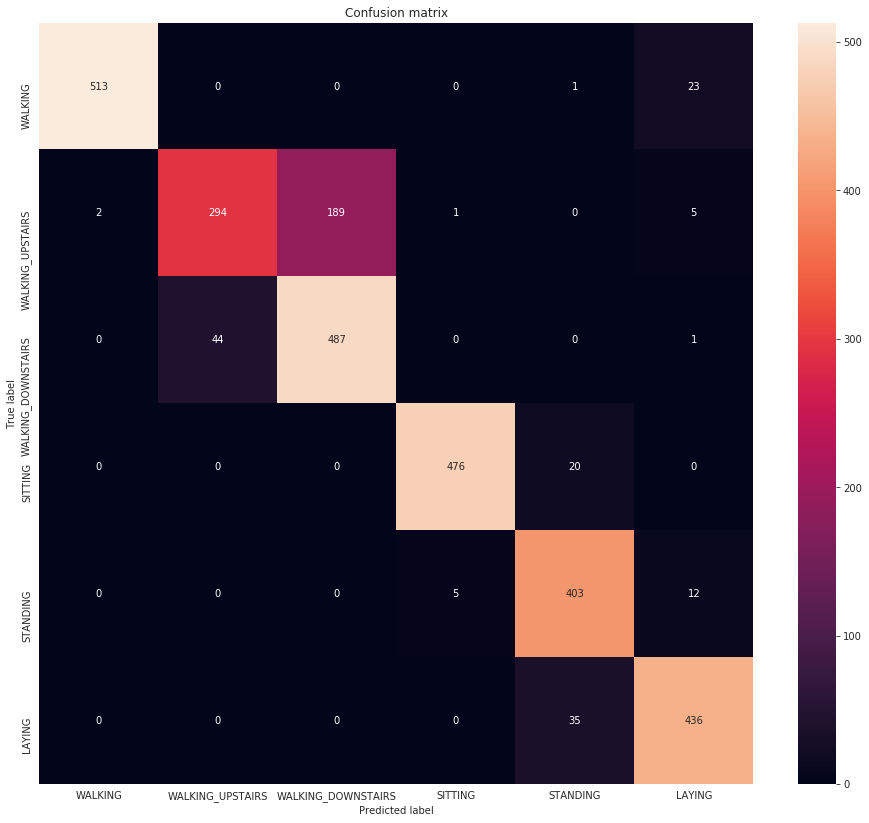

In [150]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 48 neurons in LSTM Layer with dropout of 0.50

In [151]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(32))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_5 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_28 (Dropout)         (None, 128, 48)           0         
_________________________________________________________________
lstm_29 (LSTM)               (None, 32)                10368     
_________________________________________________________________
dropout_29 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_______________________________________________________

In [152]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [153]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 76s 10ms/step - loss: 1.7586 - acc: 0.5837 - val_loss: 1.2299 - val_acc: 0.6675
Epoch 2/30
7352/7352 [==============================] - 72s 10ms/step - loss: 1.0160 - acc: 0.7074 - val_loss: 0.7532 - val_acc: 0.7988
Epoch 3/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.7515 - acc: 0.7224 - val_loss: 0.5955 - val_acc: 0.7876
Epoch 4/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.5420 - acc: 0.8143 - val_loss: 0.5667 - val_acc: 0.7798
Epoch 5/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.4415 - acc: 0.8561 - val_loss: 0.4487 - val_acc: 0.8361
Epoch 6/30
7352/7352 [==============================] - 71s 10ms/step - loss: 0.3445 - acc: 0.8966 - val_loss: 0.3606 - val_acc: 0.8850
Epoch 7/30
7352/7352 [==============================] - 72s 10ms/step - loss: 0.3159 - acc: 0.9036 - val_loss: 0.3307 - val_acc: 0.8816


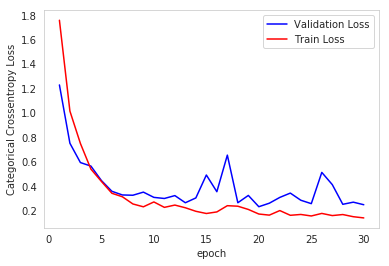

In [155]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 7, we starts to overfit the model, so best value for epoch is 7


Test Accuracy: 91.482864%



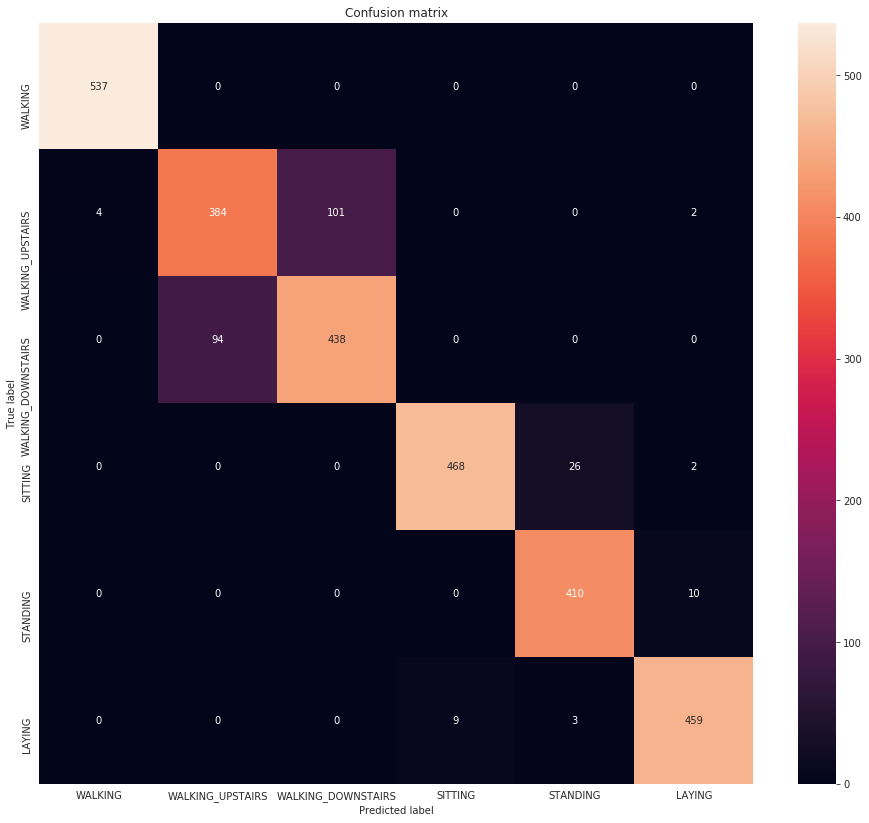

In [156]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 64 neurons in LSTM Layer with dropout of 0.50

In [159]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.50))
model.add(LSTM(48))
model.add(Dropout(0.50))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_30 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_31 (LSTM)               (None, 48)                21696     
_________________________________________________________________
dropout_31 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
______________________________________________________

In [160]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [161]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 79s 11ms/step - loss: 1.8453 - acc: 0.6298 - val_loss: 1.2404 - val_acc: 0.7421
Epoch 2/30
7352/7352 [==============================] - 75s 10ms/step - loss: 0.8378 - acc: 0.8448 - val_loss: 0.6518 - val_acc: 0.8283
Epoch 3/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.3691 - acc: 0.9154 - val_loss: 0.3260 - val_acc: 0.8914
Epoch 4/30
7352/7352 [==============================] - 75s 10ms/step - loss: 0.2331 - acc: 0.9255 - val_loss: 0.3009 - val_acc: 0.8968
Epoch 5/30
7352/7352 [==============================] - 79s 11ms/step - loss: 0.2254 - acc: 0.9279 - val_loss: 0.2761 - val_acc: 0.8999
Epoch 6/30
7352/7352 [==============================] - 79s 11ms/step - loss: 0.1959 - acc: 0.9309 - val_loss: 0.2250 - val_acc: 0.9223
Epoch 7/30
7352/7352 [==============================] - 78s 11ms/step - loss: 0.2182 - acc: 0.9234 - val_loss: 0.2251 - val_acc: 0.8968


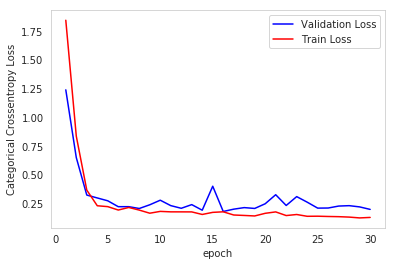

In [162]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 8, we starts to overfit the model, so best value for epoch is 8


Test Accuracy: 93.111639%



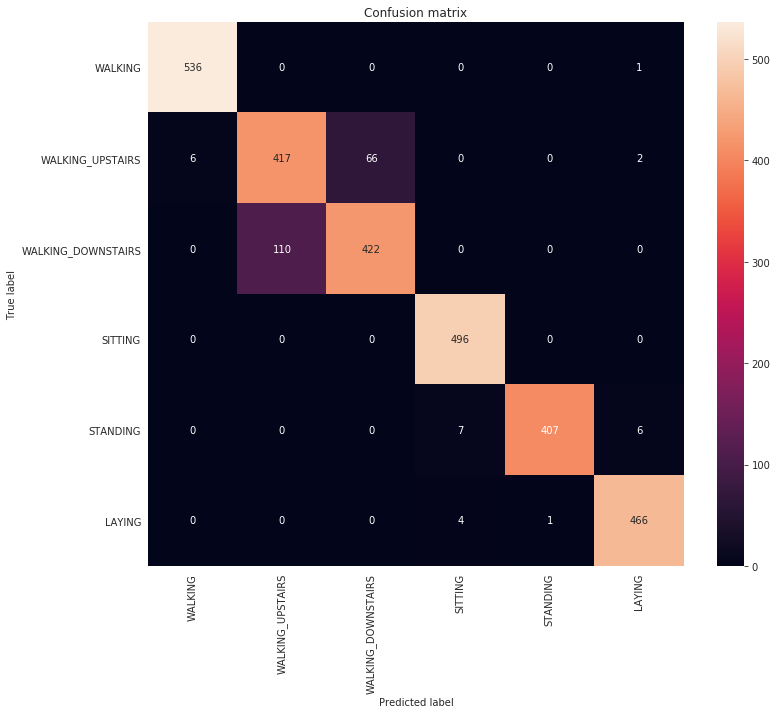

In [163]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### Tuning the number of neurons with dropout of 0.70

Configuration:

In [164]:
# Initializing parameters
n_epochs = 30
n_batch = 16
n_classes = _count_classes(y_train)

# Bias regularizer value - we will use elasticnet
reg = L1L2(0.01, 0.01)

### 32 neurons in LSTM Layer with dropout of 0.70

In [165]:
# Model execution
model = Sequential()
model.add(LSTM(32, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(32))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 128, 32)           5376      
_________________________________________________________________
batch_normalization_7 (Batch (None, 128, 32)           128       
_________________________________________________________________
dropout_32 (Dropout)         (None, 128, 32)           0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dropout_33 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 198       
Total params: 14,022
Trainable params: 13,958
Non-trainable params: 64
_______________________________________________________

In [166]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [167]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 73s 10ms/step - loss: 1.7200 - acc: 0.5092 - val_loss: 1.1351 - val_acc: 0.6637
Epoch 2/30
7352/7352 [==============================] - 69s 9ms/step - loss: 1.0967 - acc: 0.6045 - val_loss: 0.8715 - val_acc: 0.6783
Epoch 3/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.8645 - acc: 0.6485 - val_loss: 0.7218 - val_acc: 0.6709
Epoch 4/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.7733 - acc: 0.6591 - val_loss: 0.7077 - val_acc: 0.6461
Epoch 5/30
7352/7352 [==============================] - 68s 9ms/step - loss: 0.7486 - acc: 0.6693 - val_loss: 0.6514 - val_acc: 0.7346
Epoch 6/30
7352/7352 [==============================] - 69s 9ms/step - loss: 0.6926 - acc: 0.7013 - val_loss: 0.5943 - val_acc: 0.7557
Epoch 7/30
7352/7352 [==============================] - 69s 9ms/step - loss: 0.6458 - acc: 0.7312 - val_loss: 0.5387 - val_acc: 0.7577
Epoch 

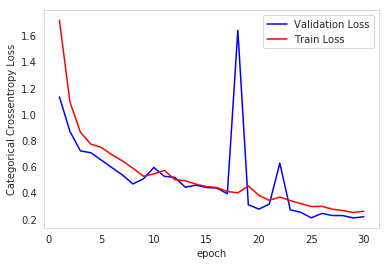

In [168]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 9, we starts to overfit the model, so best value for epoch is 9


Test Accuracy: 91.890058%



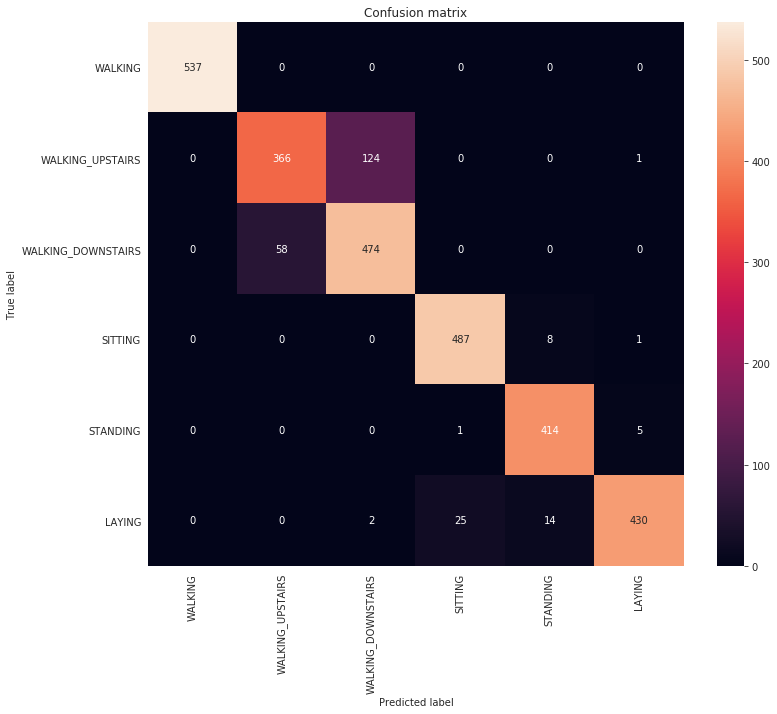

In [169]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 48 neurons in LSTM Layer with dropout of 0.70

In [170]:
# Model execution
model = Sequential()
model.add(LSTM(48, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(32))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 128, 48)           11136     
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 48)           192       
_________________________________________________________________
dropout_34 (Dropout)         (None, 128, 48)           0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 32)                10368     
_________________________________________________________________
dropout_35 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 198       
Total params: 21,894
Trainable params: 21,798
Non-trainable params: 96
_______________________________________________________

In [171]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [172]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 74s 10ms/step - loss: 1.9616 - acc: 0.5328 - val_loss: 1.3936 - val_acc: 0.6882
Epoch 2/30
7352/7352 [==============================] - 70s 10ms/step - loss: 1.1900 - acc: 0.6726 - val_loss: 0.9176 - val_acc: 0.7645
Epoch 3/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.9071 - acc: 0.6967 - val_loss: 0.7071 - val_acc: 0.7448
Epoch 4/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.6931 - acc: 0.7511 - val_loss: 0.6015 - val_acc: 0.7350
Epoch 5/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.6422 - acc: 0.7685 - val_loss: 0.4896 - val_acc: 0.8392
Epoch 6/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.5594 - acc: 0.8014 - val_loss: 0.4949 - val_acc: 0.7879
Epoch 7/30
7352/7352 [==============================] - 70s 10ms/step - loss: 0.5005 - acc: 0.8213 - val_loss: 0.5374 - val_acc: 0.7211


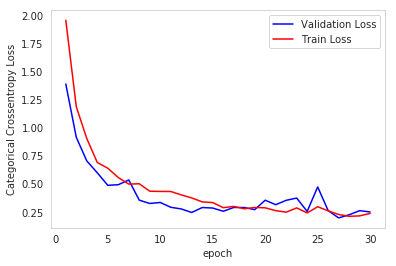

In [173]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 16, we starts to overfit the model, so best value for epoch is 16


Test Accuracy: 91.177469%



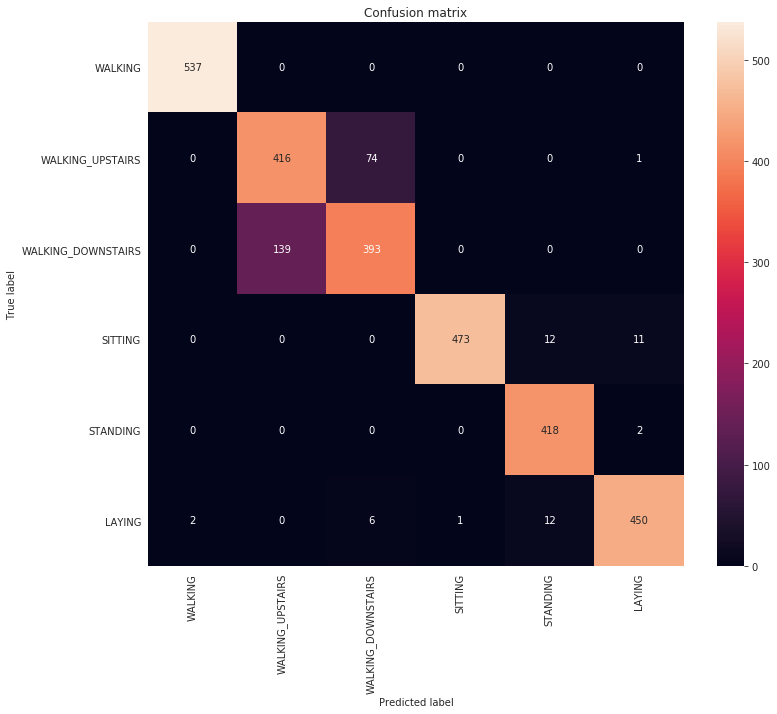

In [174]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<br/>
<br/>

### 64 neurons in LSTM Layer with dropout of 0.70

In [175]:
# Model execution
model = Sequential()
model.add(LSTM(64, input_shape=(timesteps, input_dim), return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(48))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 128, 64)           18944     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128, 64)           256       
_________________________________________________________________
dropout_36 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
lstm_37 (LSTM)               (None, 48)                21696     
_________________________________________________________________
dropout_37 (Dropout)         (None, 48)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 294       
Total params: 41,190
Trainable params: 41,062
Non-trainable params: 128
______________________________________________________

In [176]:
model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

In [177]:
start = datetime.now()

# Training the model
trained_model  = model.fit(x_train,
                           y_train,
                           batch_size=n_batch,
                           validation_data=(x_test, y_test),
                           epochs=n_epochs)

print("\n Time Taken: ",datetime.now() - start)

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 79s 11ms/step - loss: 2.0756 - acc: 0.5249 - val_loss: 1.6901 - val_acc: 0.4968
Epoch 2/30
7352/7352 [==============================] - 76s 10ms/step - loss: 1.1660 - acc: 0.6571 - val_loss: 0.9750 - val_acc: 0.7438
Epoch 3/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.8037 - acc: 0.7206 - val_loss: 0.5763 - val_acc: 0.8164
Epoch 4/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.6107 - acc: 0.7952 - val_loss: 0.5221 - val_acc: 0.7998
Epoch 5/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.4589 - acc: 0.8573 - val_loss: 0.4435 - val_acc: 0.8677
Epoch 6/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.4276 - acc: 0.8713 - val_loss: 0.4253 - val_acc: 0.8453
Epoch 7/30
7352/7352 [==============================] - 74s 10ms/step - loss: 0.3439 - acc: 0.8945 - val_loss: 0.3199 - val_acc: 0.9030


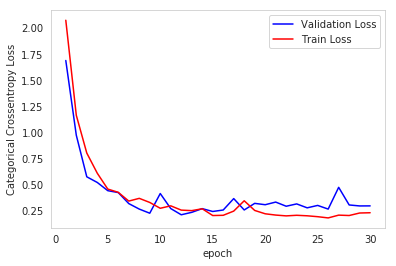

In [178]:
print()
print()

# Plot train and cross validation error
plot_train_cv_loss(trained_model, n_epochs)

From epoch 7, we starts to overfit the model, so best value for epoch is 7


Test Accuracy: 88.903970%



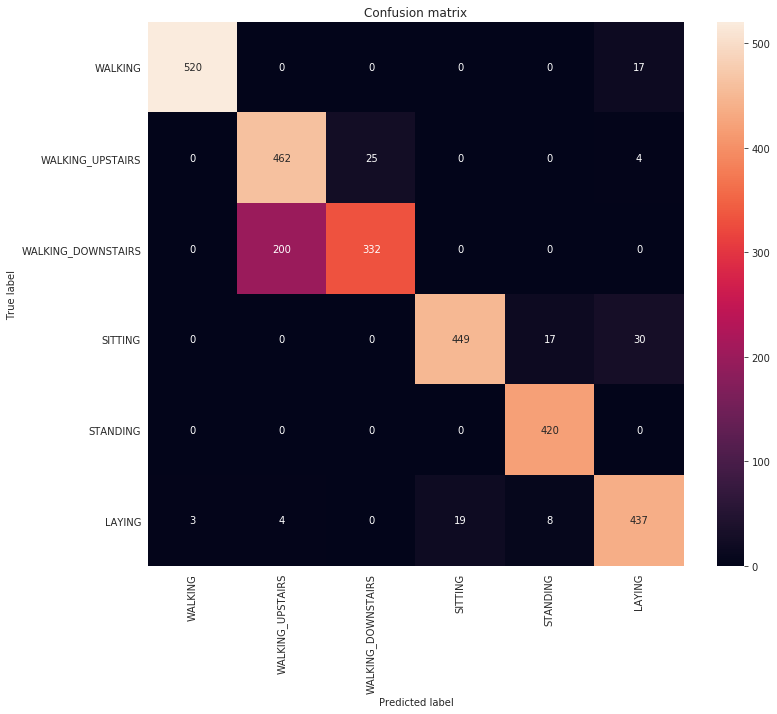

In [179]:
print()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()

Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_test, axis=1)])
Y_predictions = pd.Series([ACTIVITIES[y] for y in np.argmax(model.predict(x_test), axis=1)])

# Confusion Matrix
plot_confusion_matrix_lstm(Y_true, Y_predictions)

<h2> Conclusion </h2>

In [3]:
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model Comparision "
ptable.field_names = ["LSTM Layers",'No. of Neurons in LSTM Layer','Dropout', 'Best Epoch']
ptable.add_row(["2","32","0.50","10"])
ptable.add_row(["2","48","0.50","7"])
ptable.add_row(["2","64","0.50","8"])
ptable.add_row(["\n","\n","\n","\n"])
ptable.add_row(["2","32","0.70","9"])
ptable.add_row(["2","48","0.70","16"])
ptable.add_row(["2","64","0.70","7"])
print(ptable)

+-------------------------------------------------------------------+
|                         Model Comparision                         |
+-------------+------------------------------+---------+------------+
| LSTM Layers | No. of Neurons in LSTM Layer | Dropout | Best Epoch |
+-------------+------------------------------+---------+------------+
|      2      |              32              |   0.50  |     10     |
|      2      |              48              |   0.50  |     7      |
|      2      |              64              |   0.50  |     8      |
|             |                              |         |            |
|             |                              |         |            |
|      2      |              32              |   0.70  |     9      |
|      2      |              48              |   0.70  |     16     |
|      2      |              64              |   0.70  |     7      |
+-------------+------------------------------+---------+------------+


From all the plots, we have observed that 64 neurons with 0.50 dropout rate will be the good choice, among all the models.